# Initializing Notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns

sns.set_style('darkgrid')
SMALL_SIZE = 12
MEDIUM_SIZE = 30
BIGGER_SIZE = 70
#plt.rc('font', size=MEDIUM_SIZE)          
plt.rc('axes', titlesize= MEDIUM_SIZE)    
plt.rc('axes', labelsize= MEDIUM_SIZE)   
plt.rc('xtick', labelsize= MEDIUM_SIZE)    
plt.rc('ytick', labelsize= MEDIUM_SIZE)    
plt.rc('legend', fontsize= MEDIUM_SIZE)


In [3]:
WEST = pd.read_excel('WEST.xlsx',index_col='index',parse_dates=True)
SOUTH = pd.read_excel('SOUTH.xlsx',index_col='index',parse_dates=True)
MIDATL = pd.read_excel('MIDATL.xlsx',index_col='index',parse_dates=True)
dfs = [WEST,MIDATL,SOUTH]


for i in range(len(dfs)):
    dfs[i].index = pd.to_datetime(dfs[i].index).round('h')
    dates = dfs[i].index
    dfs[i]['MonthNumber'] = dfs[i].index.month
    dfs[i]['WeekNumber'] = dfs[i].index.week
    dfs[i]['DayNumber'] = dfs[i].index.dayofweek
    dfs[i]['HourNumber'] = dfs[i].index.hour
    columns = dfs[i].columns
    x = dfs[i].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    dfs[i] = pd.DataFrame(x_scaled, columns = columns)
    dfs[i].index = dates

WEST = dfs[0]
MIDATL = dfs[1]
SOUTH = dfs[2]

# ------------------------------------------------------------------------------------------

# MIDATL

# ------------------------------------------------------------------------------------------

## Feature Exploration

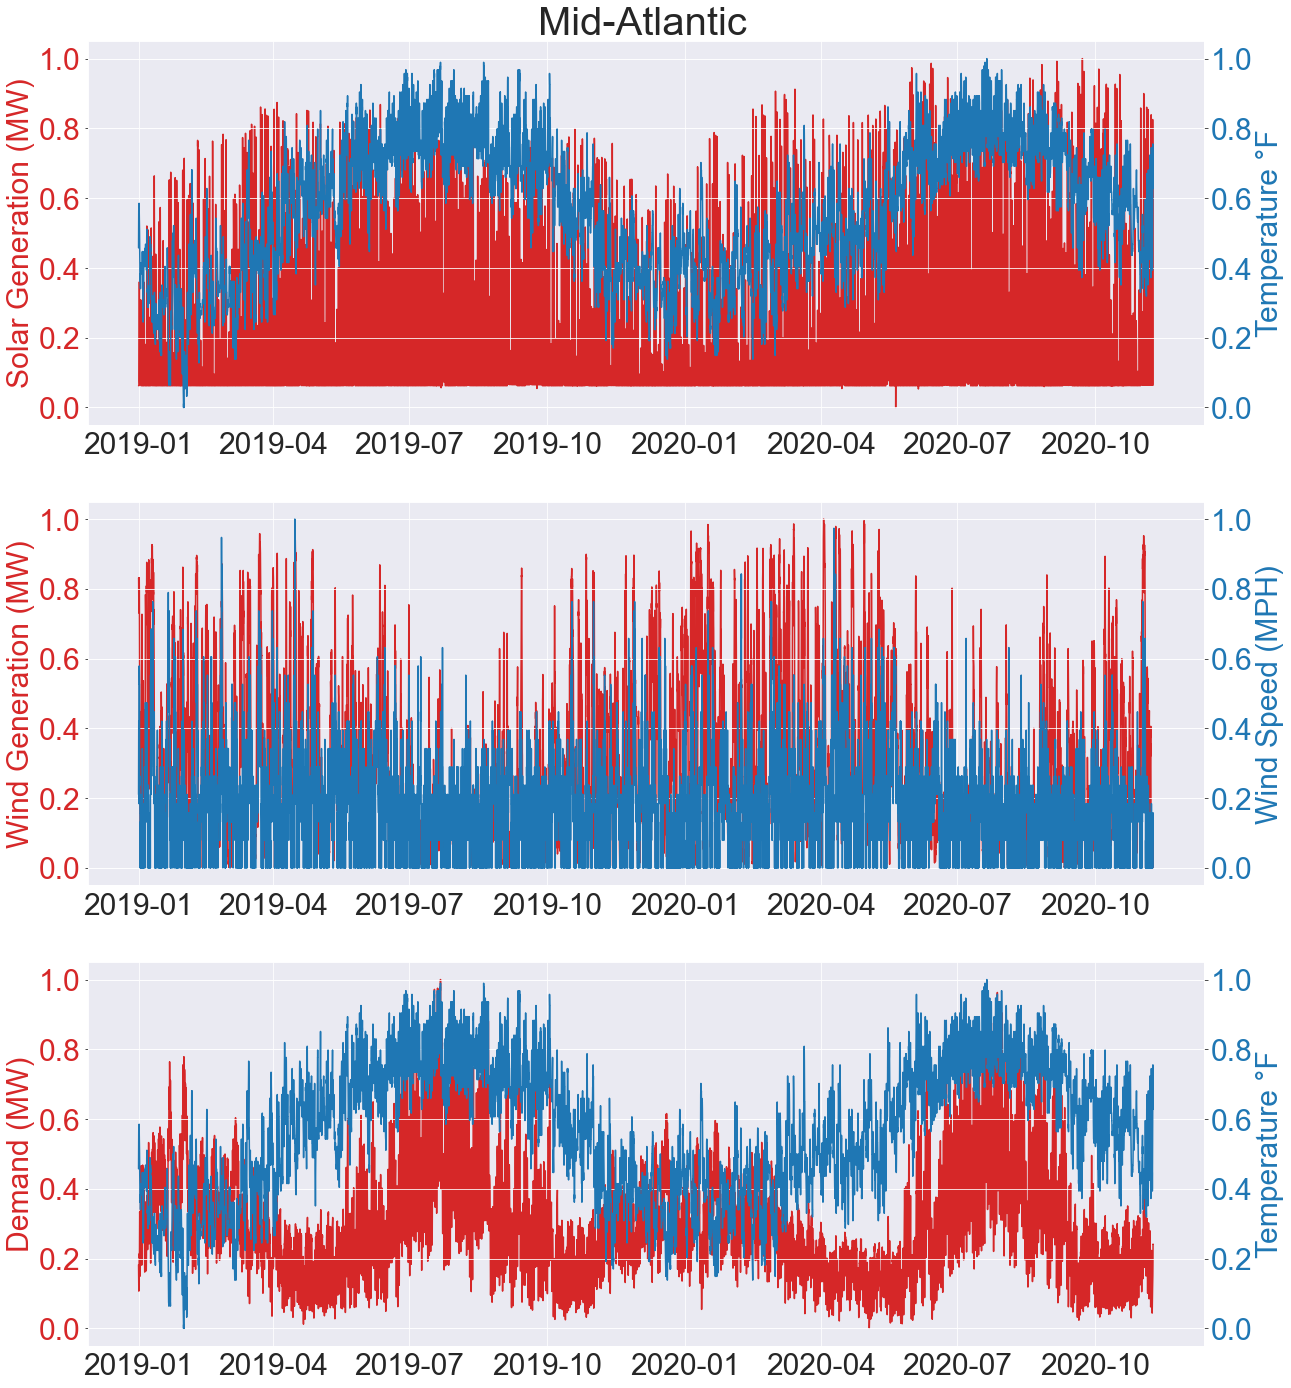

In [4]:
plt.figure(figsize = (20,24))
dfs = MIDATL
regions = 'MIDATL'
REN = ['_solar','_wind','_demand']
REN2 = ['HourlyDryBulbTemperature','HourlyWindSpeed','HourlyDryBulbTemperature']
y1 = ['Solar Generation (MW)','Wind Generation (MW)','Demand (MW)']
y2 = ['Temperature \N{DEGREE SIGN}F','Wind Speed (MPH)','Temperature \N{DEGREE SIGN}F']


for i,g in zip(range(3),range(1,4)):

    ax = plt.subplot(3,1,g)
    plt.suptitle('Mid-Atlantic', fontsize=40,x=.51, y=0.90)
    color = 'tab:red'
    ax.plot(dfs.index, dfs[regions+REN[i]], color=color)
    ax.set_ylabel(y1[i], color=color)
    ax.tick_params(axis='y', labelcolor=color)
    labels = ax.get_xticks()[::2]
    ax.set_xticks(labels)
   
    ax2 = ax.twinx()

    
    color = 'tab:blue'
    ax2.plot(dfs.index , dfs[REN2[i]], color=color)
    ax2.set_ylabel(y2[i], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
 

## Feature Importances

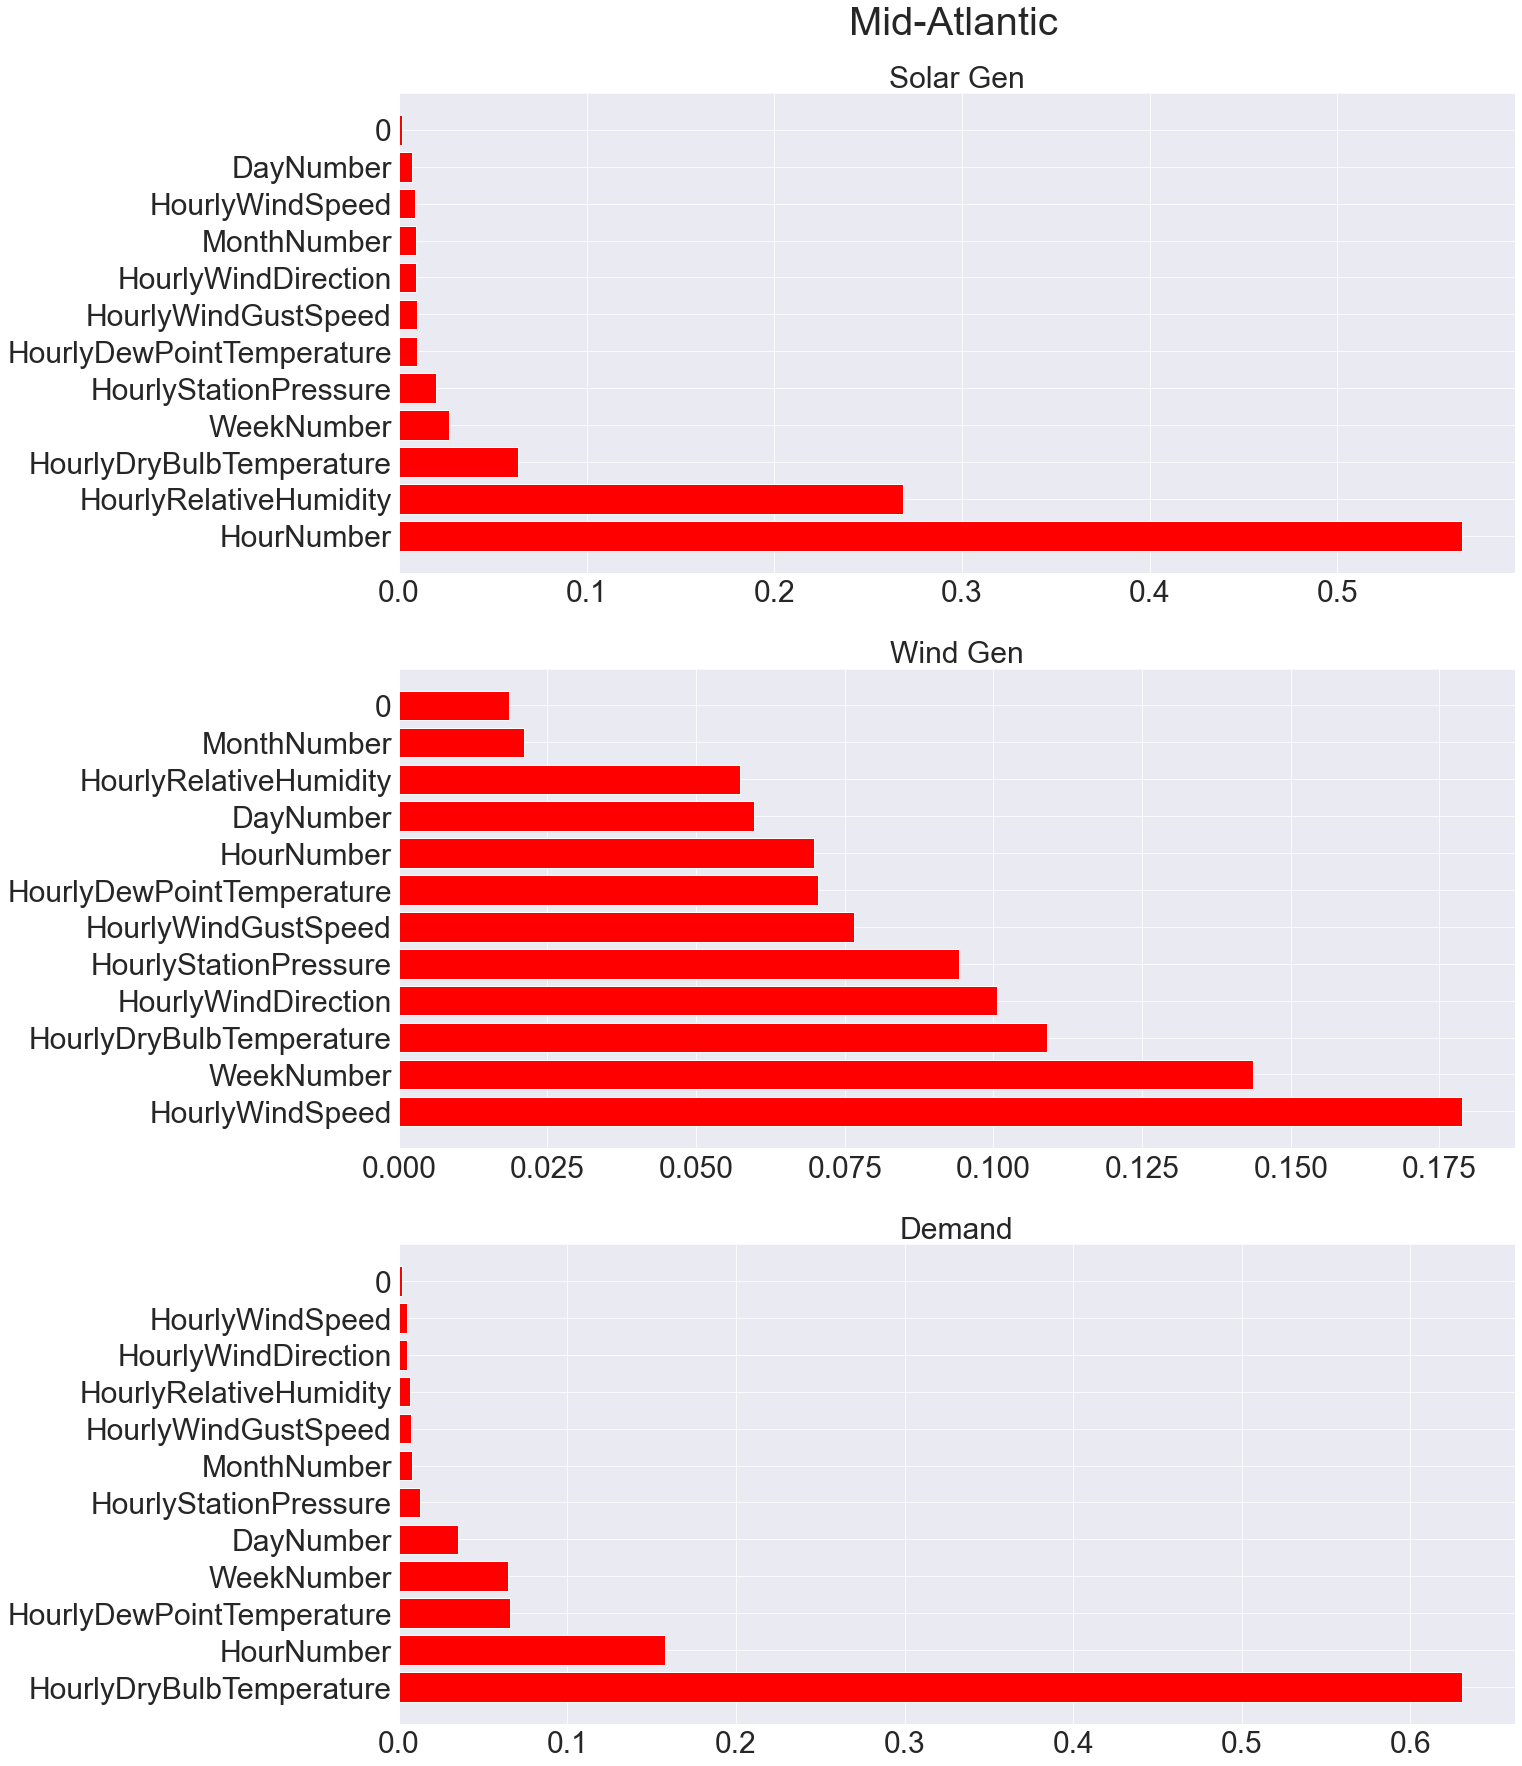

In [5]:
plt.figure(figsize = (20,30))
dfs = MIDATL
regions = 'MIDATL'
REN = ['_solar','_wind','_demand']

names = ['Mid-Atlantic']
ranges = [range(1,4)]
ranges = []
lm = LinearRegression()
tr = DecisionTreeRegressor()
for g,r in zip(range(1,4), range(len(REN)) ):
   
    ax = plt.subplot(3,1,g)
    plt.suptitle('Mid-Atlantic', fontsize=40,x=.51, y=0.92)
    X = dfs.drop(dfs.columns[-7:-4], axis=1)
    y = dfs[str(regions)+REN[r]]

    split = 0.99

    X_train, X_test, y_train, y_test = X[:int(split*len(X))], X[int(split*len(X)):], y[:int(split*len(X))], y[int(split*len(X)):]        
    
    
    dt = DecisionTreeRegressor(criterion = 'mse')
    dt.fit(X_train,y_train)
   
    
   
    importances = dt.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.rcParams.update({'font.size': 8})
    #############
    aa = X.columns.values.tolist()
    indexgraph = [0]*len(aa)
    for q,j in zip(indices,range(11)):
        indexgraph[j] = aa[q]

    ax.barh(range(X.shape[1]), importances[indices],
            color="r", align="center")
    plt.title("Feature importances")
    plt.yticks(range(X.shape[1]), indexgraph)
    plt.ylim([-1, X.shape[1]])

    
    if REN[r] == '_solar':
        plt.title('Solar Gen', fontsize=30)
        
     
    if REN[r] == '_wind':
        plt.title('Wind Gen', fontsize=30)
        
  
    if REN[r] == '_demand':
        plt.title('Demand', fontsize=30)

## Modeling

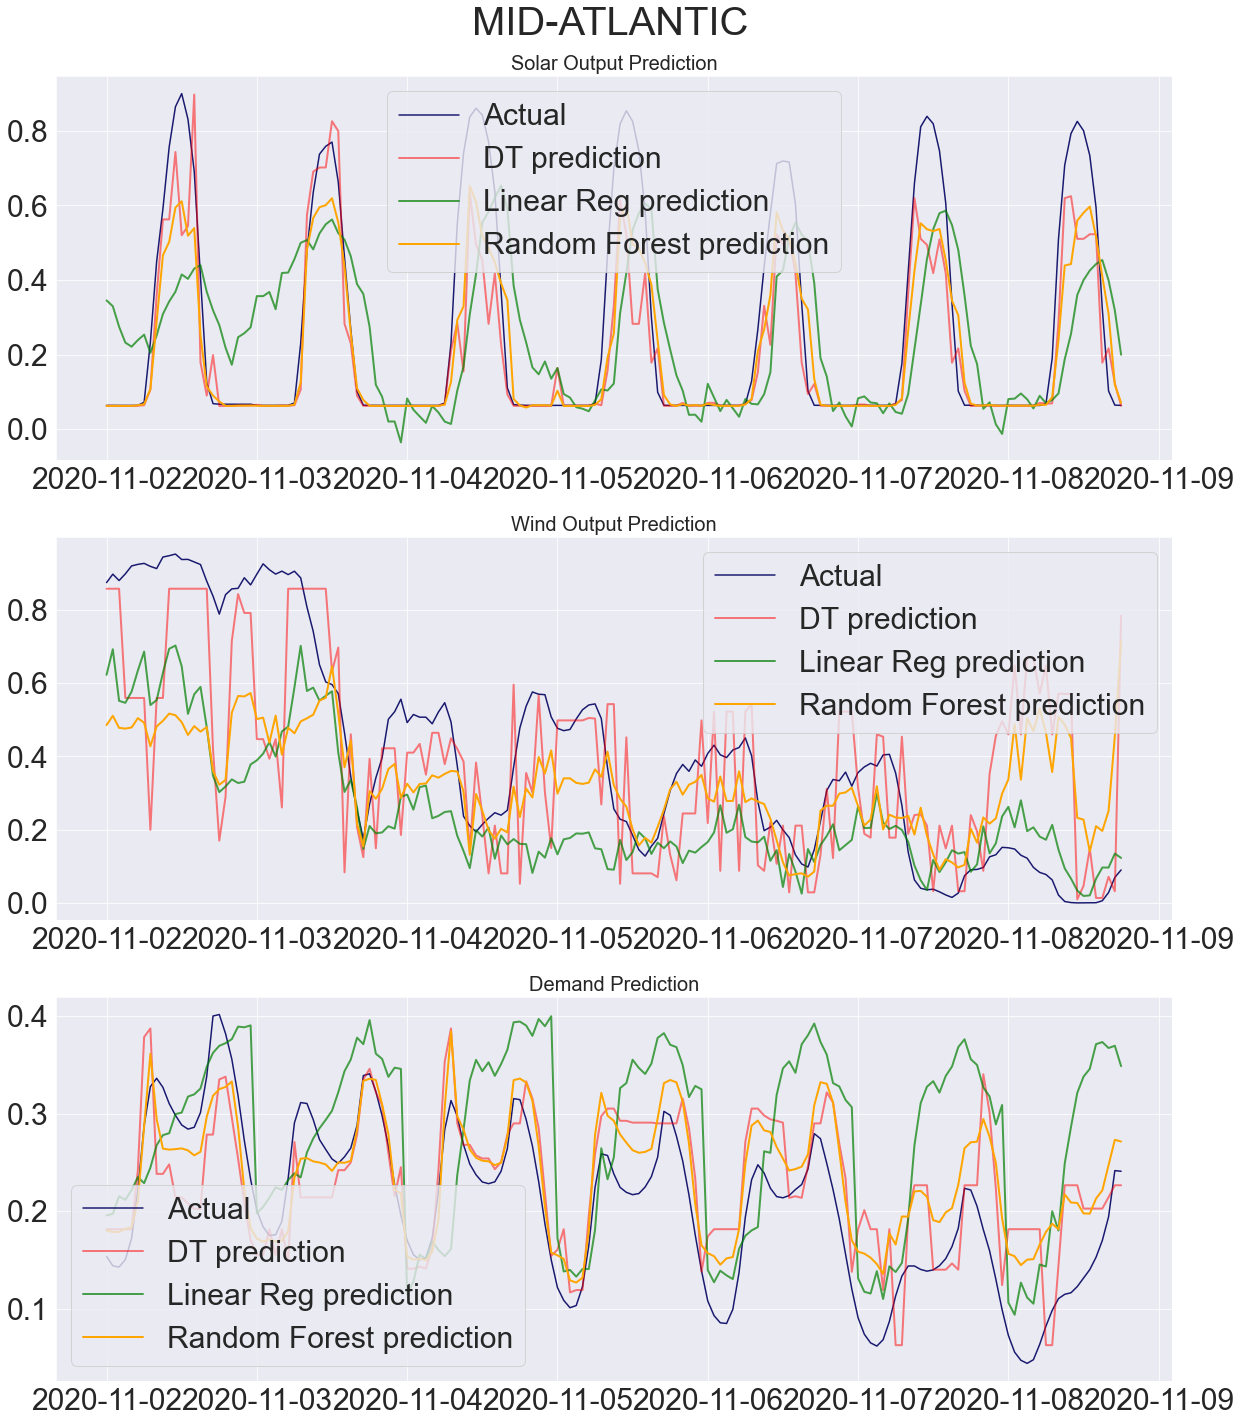

In [8]:
plt.figure(figsize = (20,24))
dfs = MIDATL
regions = 'MIDATL'
REN = ['_solar','_wind','_demand']

names = ['Mid-Atlantic']
ranges = [range(1,4)]
ranges = []
lm = LinearRegression()
tr = DecisionTreeRegressor()
for g,r in zip(range(1,4), range(len(REN)) ):
   
    ax = plt.subplot(3,1,g)
    plt.suptitle('MID-ATLANTIC', fontsize=40,x=.51, y=0.92)
    X = dfs.drop(dfs.columns[-7:-4], axis=1)
    y = dfs[str(regions)+REN[r]]

    split = 0.99

    X_train, X_test, y_train, y_test = X[:int(split*len(X))], X[int(split*len(X)):], y[:int(split*len(X))], y[int(split*len(X)):]        
    
    
    dt = DecisionTreeRegressor(criterion = 'mse')
    dt.fit(X_train,y_train)
    y_1 = dt.predict(X_test)
    
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_2 = lr.predict(X_test)

    rf = RandomForestRegressor()
    rf.fit(X_train,y_train)
    y_3 =rf.predict(X_test)
    
    
    ax.plot(X_test.index.tolist(), y_test,color = 'midnightblue',label="Actual")
    
    ax.plot(X_test.index.tolist(), y_1, color="red",alpha=0.5,
              label="DT prediction", linewidth=2)
    
    ax.plot(X_test.index.tolist(), y_2, color="green", alpha=0.7,
              label="Linear Reg prediction", linewidth=2)
    
    ax.plot(X_test.index.tolist(), y_3, color="orange", alpha=1,
              label="Random Forest prediction", linewidth=2)
    
    
    labels = ax.get_xticks()[::1]
    ax.set_xticks(labels)
    plt.legend()
    
    
    if REN[r] == '_solar':
        plt.title('Solar Output Prediction', fontsize=20)
        
     
    if REN[r] == '_wind':
        plt.title('Wind Output Prediction', fontsize=20)
        
  
    if REN[r] == '_demand':
        plt.title('Demand Prediction', fontsize=20)
                     
    

# ------------------------------------------------------------------------------------------

# WEST

# ------------------------------------------------------------------------------------------

## Feature Exploration

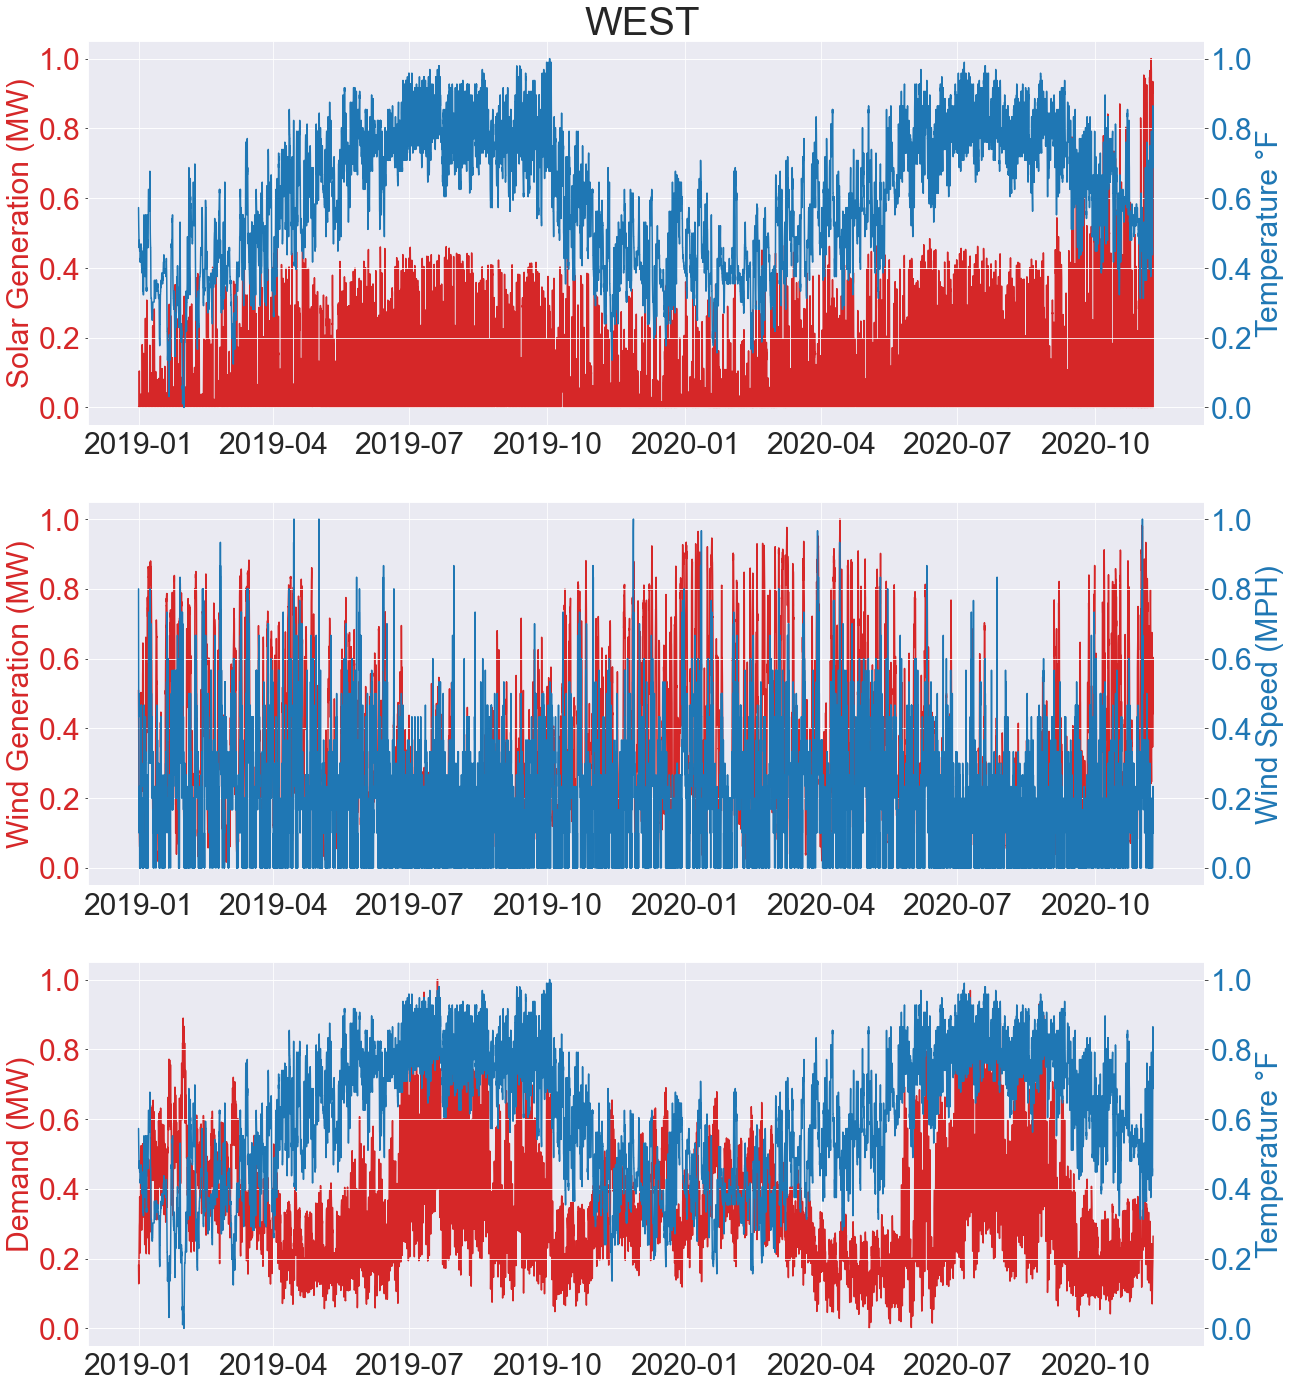

In [29]:
plt.figure(figsize = (20,24))
dfs = WEST
regions = 'WEST'
REN = ['_solar','_wind','_demand']
REN2 = ['HourlyDryBulbTemperature','HourlyWindSpeed','HourlyDryBulbTemperature']
y1 = ['Solar Generation (MW)','Wind Generation (MW)','Demand (MW)']
y2 = ['Temperature \N{DEGREE SIGN}F','Wind Speed (MPH)','Temperature \N{DEGREE SIGN}F']

for i,g in zip(range(3),range(1,4)):

    ax = plt.subplot(3,1,g)
    plt.suptitle('WEST', fontsize=40,x=.51, y=0.90)
    color = 'tab:red'
    ax.plot(dfs.index, dfs[regions+REN[i]], color=color)
    ax.set_ylabel(y1[i], color=color)
    ax.tick_params(axis='y', labelcolor=color)
    labels = ax.get_xticks()[::2]
    ax.set_xticks(labels)
   
    ax2 = ax.twinx()

    
    color = 'tab:blue'
    ax2.plot(dfs.index , dfs[REN2[i]], color=color)
    ax2.set_ylabel(y2[i], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

## Feature Importances

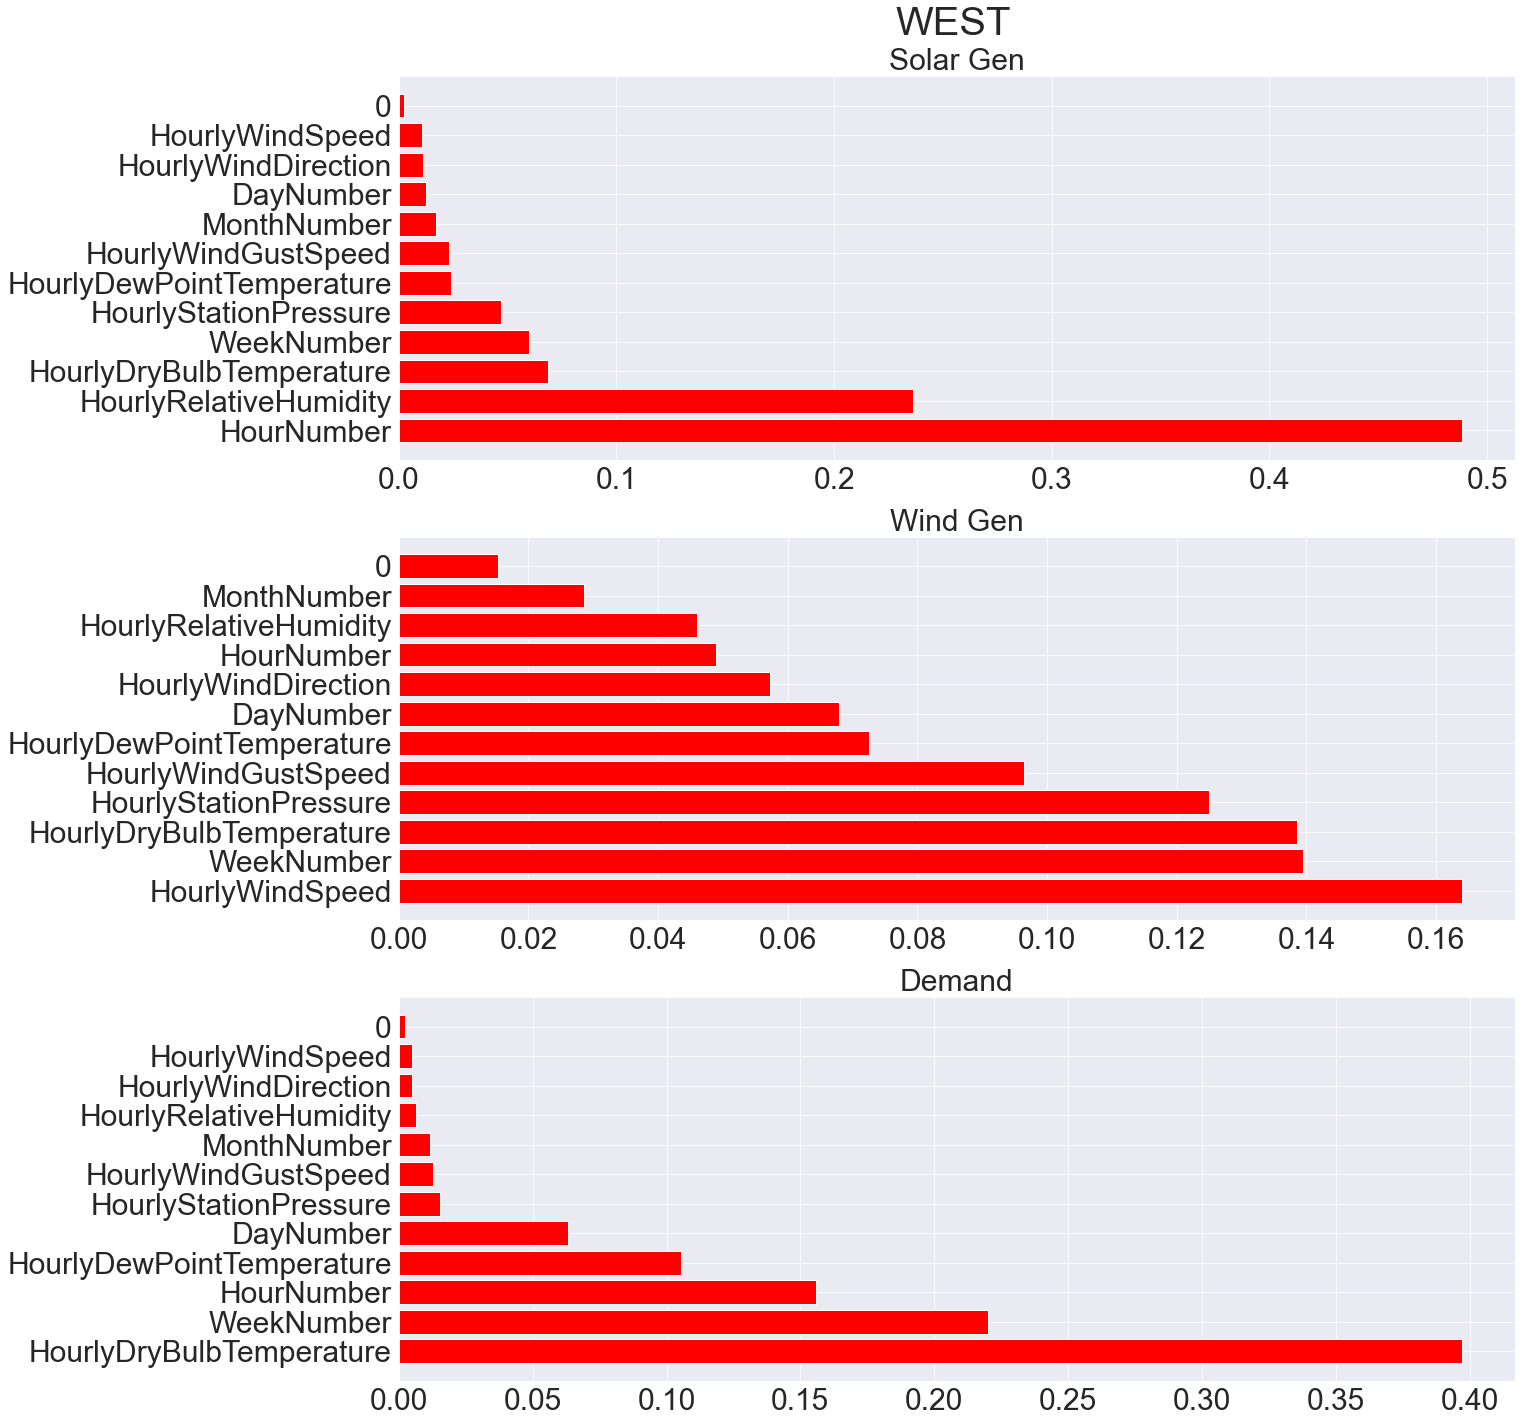

In [30]:
plt.figure(figsize = (20,24))
dfs = WEST
regions = 'WEST'
REN = ['_solar','_wind','_demand']

names = ['WEST']
ranges = [range(1,4)]
ranges = []
lm = LinearRegression()
tr = DecisionTreeRegressor()
for g,r in zip(range(1,4), range(len(REN)) ):
   
    ax = plt.subplot(3,1,g)
    plt.suptitle('WEST', fontsize=40,x=.51, y=0.92)
    X = dfs.drop(dfs.columns[-7:-4], axis=1)
    y = dfs[str(regions)+REN[r]]

    split = 0.99

    X_train, X_test, y_train, y_test = X[:int(split*len(X))], X[int(split*len(X)):], y[:int(split*len(X))], y[int(split*len(X)):]        
    
    
    dt = DecisionTreeRegressor(criterion = 'mse')
    dt.fit(X_train,y_train)
   
    
   
    importances = dt.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.rcParams.update({'font.size': 8})
    #############
    aa = X.columns.values.tolist()
    indexgraph = [0]*len(aa)
    for q,j in zip(indices,range(11)):
        indexgraph[j] = aa[q]

    ax.barh(range(X.shape[1]), importances[indices],
            color="r", align="center")
    plt.title("Feature importances")
    plt.yticks(range(X.shape[1]), indexgraph)
    plt.ylim([-1, X.shape[1]])

    
    if REN[r] == '_solar':
        plt.title('Solar Gen', fontsize=30)
        
     
    if REN[r] == '_wind':
        plt.title('Wind Gen', fontsize=30)
        
  
    if REN[r] == '_demand':
        plt.title('Demand', fontsize=30)

## Models

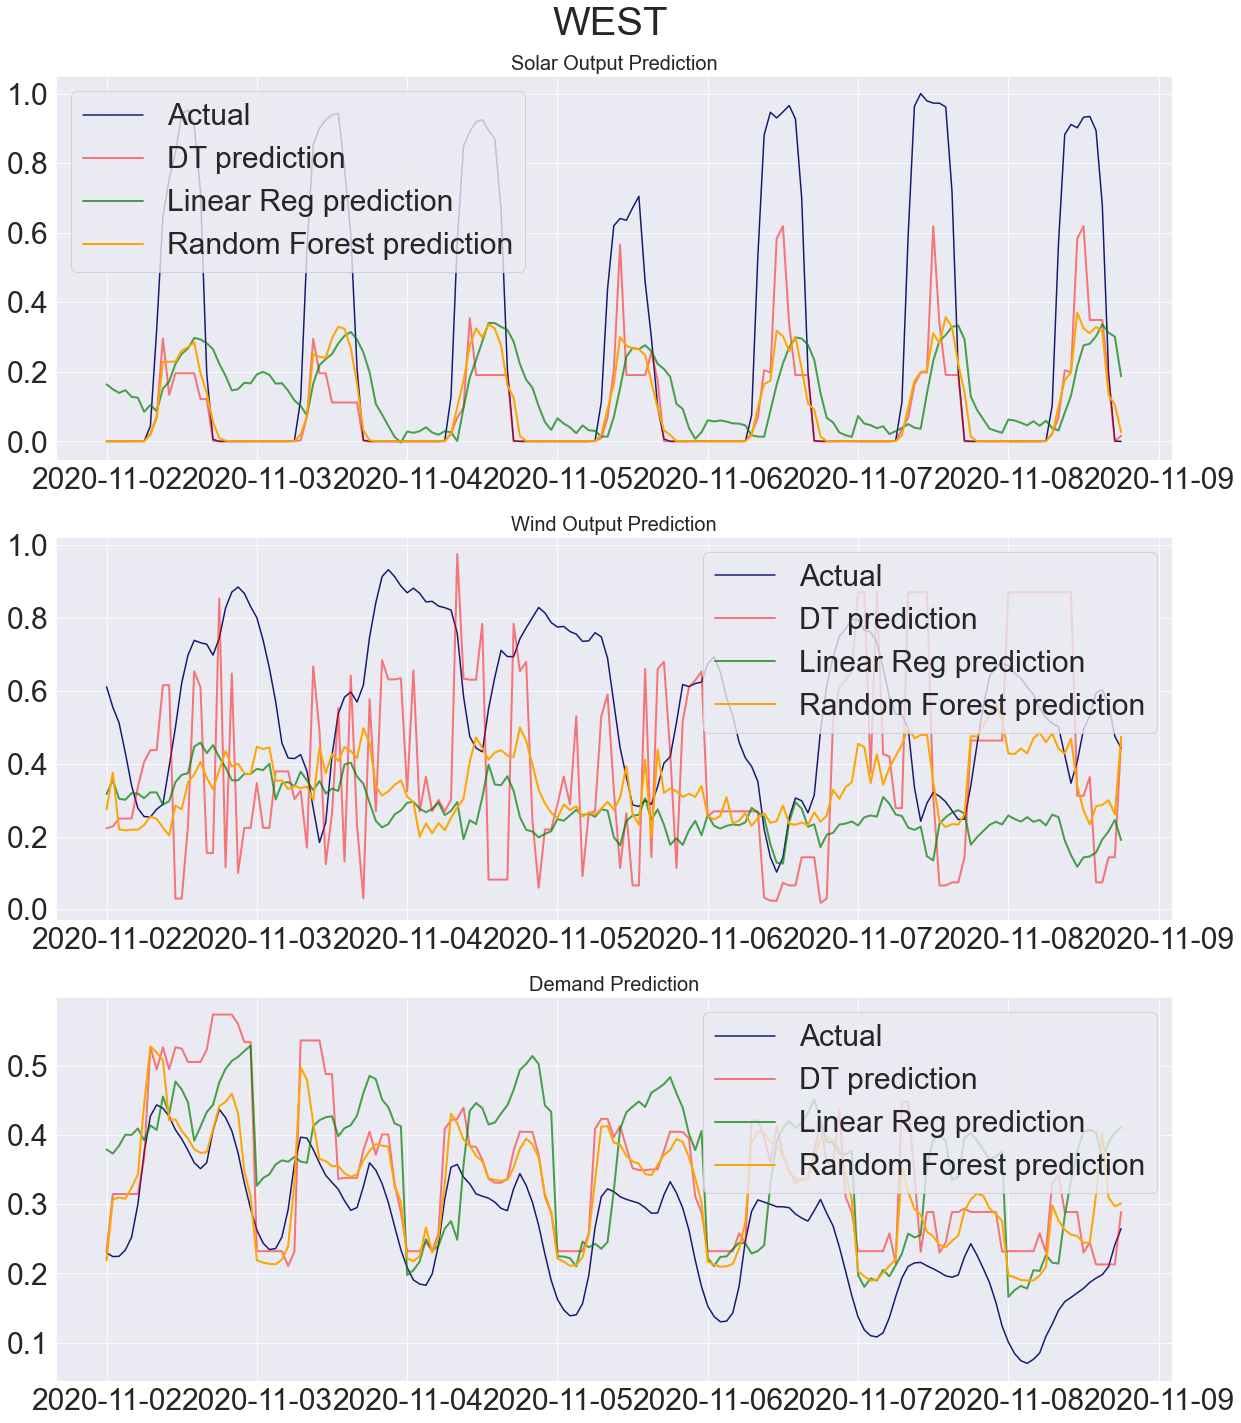

In [31]:
plt.figure(figsize = (20,24))
dfs = WEST
regions = 'WEST'
REN = ['_solar','_wind','_demand']

names = ['WEST']
ranges = [range(1,4)]
ranges = []
lm = LinearRegression()
tr = DecisionTreeRegressor()
for g,r in zip(range(1,4), range(len(REN)) ):
   
    ax = plt.subplot(3,1,g)
    plt.suptitle('WEST', fontsize=40,x=.51, y=0.92)
    X = dfs.drop(dfs.columns[-7:-4], axis=1)
    y = dfs[str(regions)+REN[r]]

    split = 0.99

    X_train, X_test, y_train, y_test = X[:int(split*len(X))], X[int(split*len(X)):], y[:int(split*len(X))], y[int(split*len(X)):]        
    
    
    dt = DecisionTreeRegressor(criterion = 'mse')
    dt.fit(X_train,y_train)
    y_1 = dt.predict(X_test)
    
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_2 = lr.predict(X_test)

    rf = RandomForestRegressor()
    rf.fit(X_train,y_train)
    y_3 =rf.predict(X_test)
    
    
    ax.plot(X_test.index.tolist(), y_test,color = 'midnightblue',label="Actual")
    
    ax.plot(X_test.index.tolist(), y_1, color="red",alpha=0.5,
              label="DT prediction", linewidth=2)
    
    ax.plot(X_test.index.tolist(), y_2, color="green", alpha=0.7,
              label="Linear Reg prediction", linewidth=2)
    
    ax.plot(X_test.index.tolist(), y_3, color="orange", alpha=1,
              label="Random Forest prediction", linewidth=2)
    
    
    labels = ax.get_xticks()[::1]
    ax.set_xticks(labels)
    plt.legend()
    
    
    if REN[r] == '_solar':
        plt.title('Solar Output Prediction', fontsize=20)
        
     
    if REN[r] == '_wind':
        plt.title('Wind Output Prediction', fontsize=20)
        
  
    if REN[r] == '_demand':
        plt.title('Demand Prediction', fontsize=20)

# ------------------------------------------------------------------------------------------

# SOUTH

# ------------------------------------------------------------------------------------------

## Data Exploration

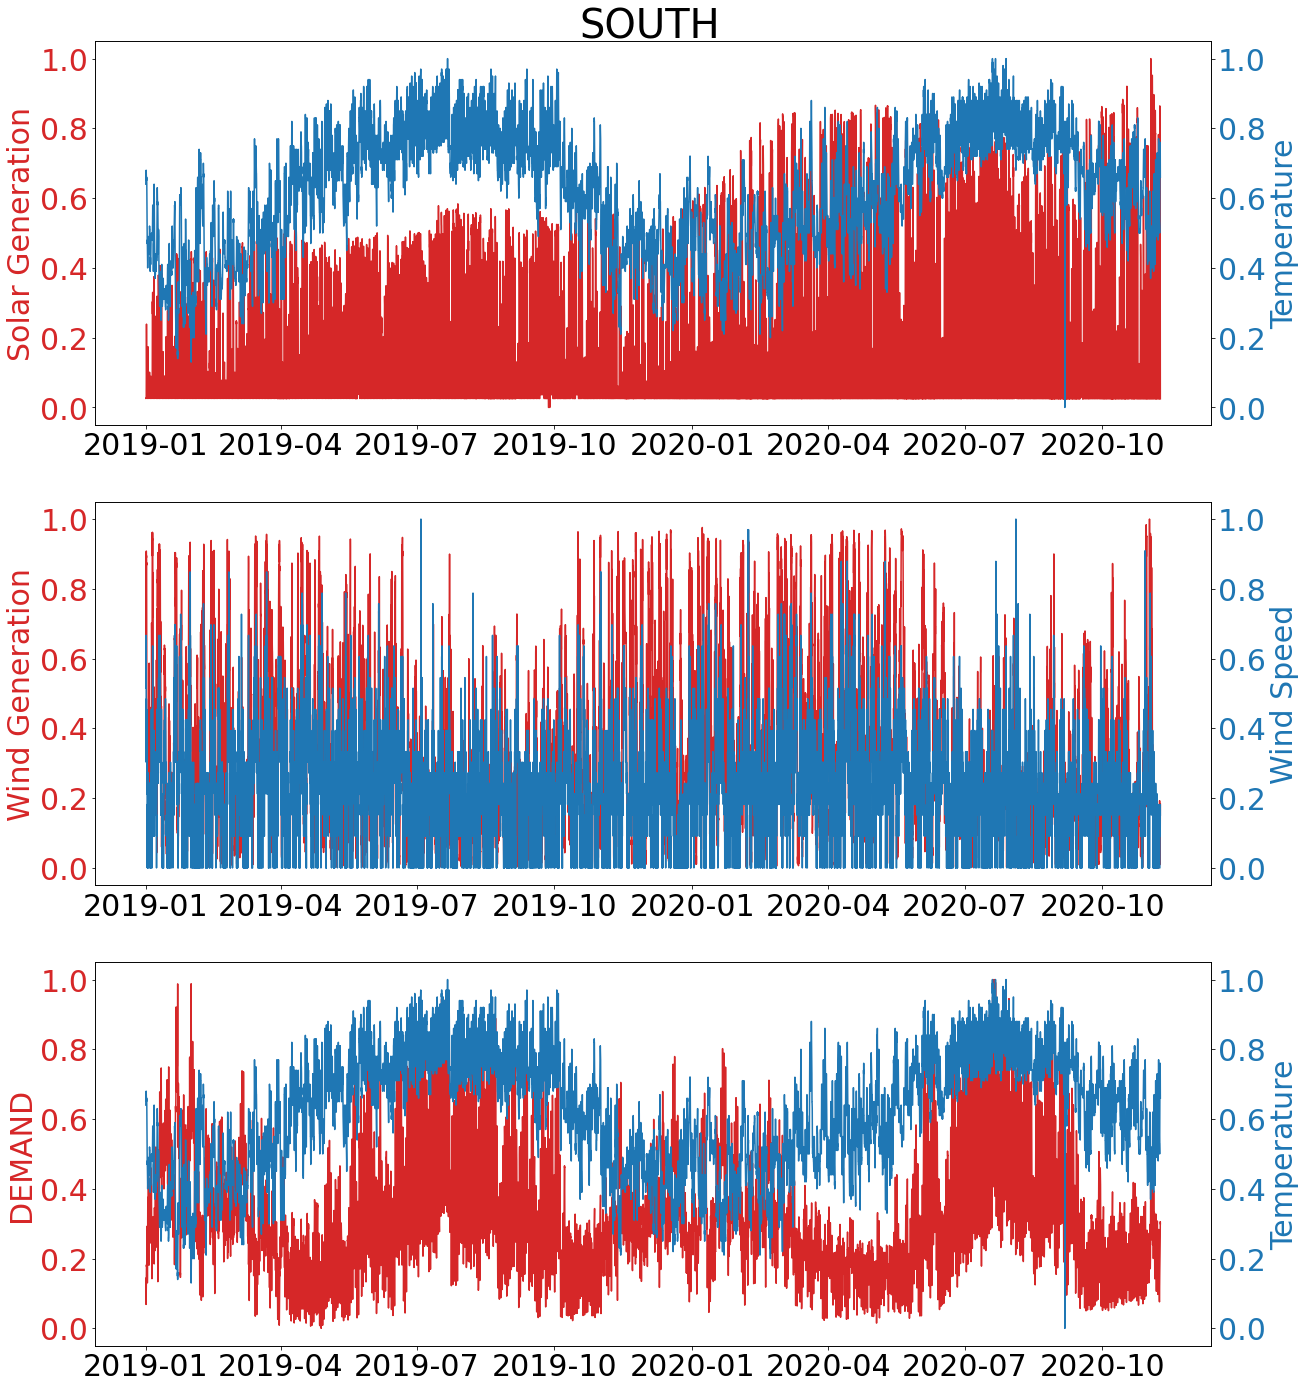

In [20]:
plt.figure(figsize = (20,24))
dfs = SOUTH
regions = 'SOUTH'
REN = ['_solar','_wind','_demand']
REN2 = ['HourlyDryBulbTemperature','HourlyWindSpeed','HourlyDryBulbTemperature']
y1 = ['Solar Generation','Wind Generation','DEMAND']
y2 = ['Temperature','Wind Speed','Temperature']


for i,g in zip(range(3),range(1,4)):

    ax = plt.subplot(3,1,g)
    plt.suptitle('SOUTH', fontsize=40,x=.51, y=0.90)
    color = 'tab:red'
    ax.plot(dfs.index, dfs[regions+REN[i]], color=color)
    ax.set_ylabel(y1[i], color=color)
    ax.tick_params(axis='y', labelcolor=color)
    labels = ax.get_xticks()[::2]
    ax.set_xticks(labels)
   
    ax2 = ax.twinx()

    
    color = 'tab:blue'
    ax2.plot(dfs.index , dfs[REN2[i]], color=color)
    ax2.set_ylabel(y2[i], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

## Feature Importances

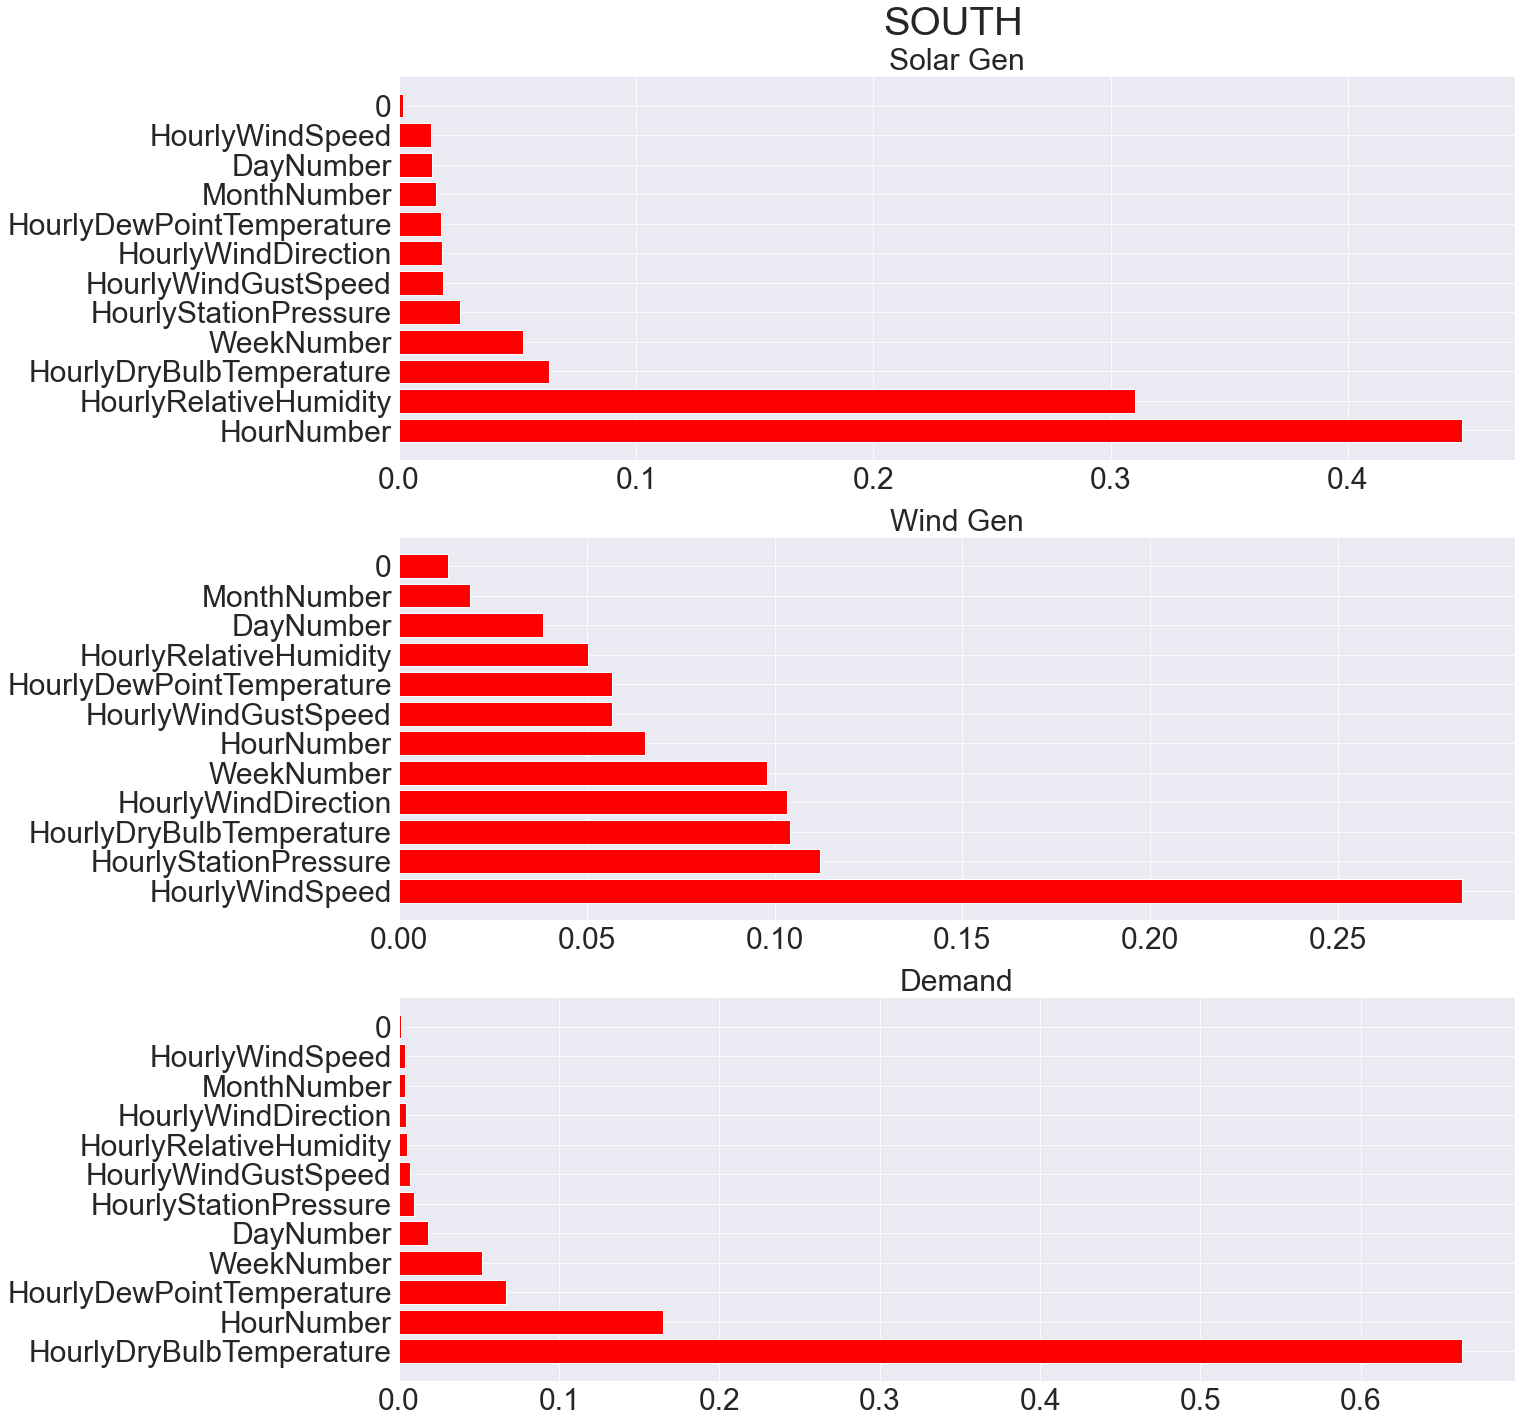

In [32]:
plt.figure(figsize = (20,24))
dfs = SOUTH
regions = 'SOUTH'
REN = ['_solar','_wind','_demand']

names = ['SOUTH']
ranges = [range(1,4)]
ranges = []
lm = LinearRegression()
tr = DecisionTreeRegressor()
for g,r in zip(range(1,4), range(len(REN)) ):
   
    ax = plt.subplot(3,1,g)
    plt.suptitle('SOUTH', fontsize=40,x=.51, y=0.92)
    X = dfs.drop(dfs.columns[-7:-4], axis=1)
    y = dfs[str(regions)+REN[r]]

    split = 0.99

    X_train, X_test, y_train, y_test = X[:int(split*len(X))], X[int(split*len(X)):], y[:int(split*len(X))], y[int(split*len(X)):]        
    
    
    dt = DecisionTreeRegressor(criterion = 'mse')
    dt.fit(X_train,y_train)
   
    
   
    importances = dt.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.rcParams.update({'font.size': 8})
    #############
    aa = X.columns.values.tolist()
    indexgraph = [0]*len(aa)
    for q,j in zip(indices,range(11)):
        indexgraph[j] = aa[q]

    ax.barh(range(X.shape[1]), importances[indices],
            color="r", align="center")
    plt.title("Feature importances")
    plt.yticks(range(X.shape[1]), indexgraph)
    plt.ylim([-1, X.shape[1]])

    
    if REN[r] == '_solar':
        plt.title('Solar Gen', fontsize=30)
        
     
    if REN[r] == '_wind':
        plt.title('Wind Gen', fontsize=30)
        
  
    if REN[r] == '_demand':
        plt.title('Demand', fontsize=30)

## Models

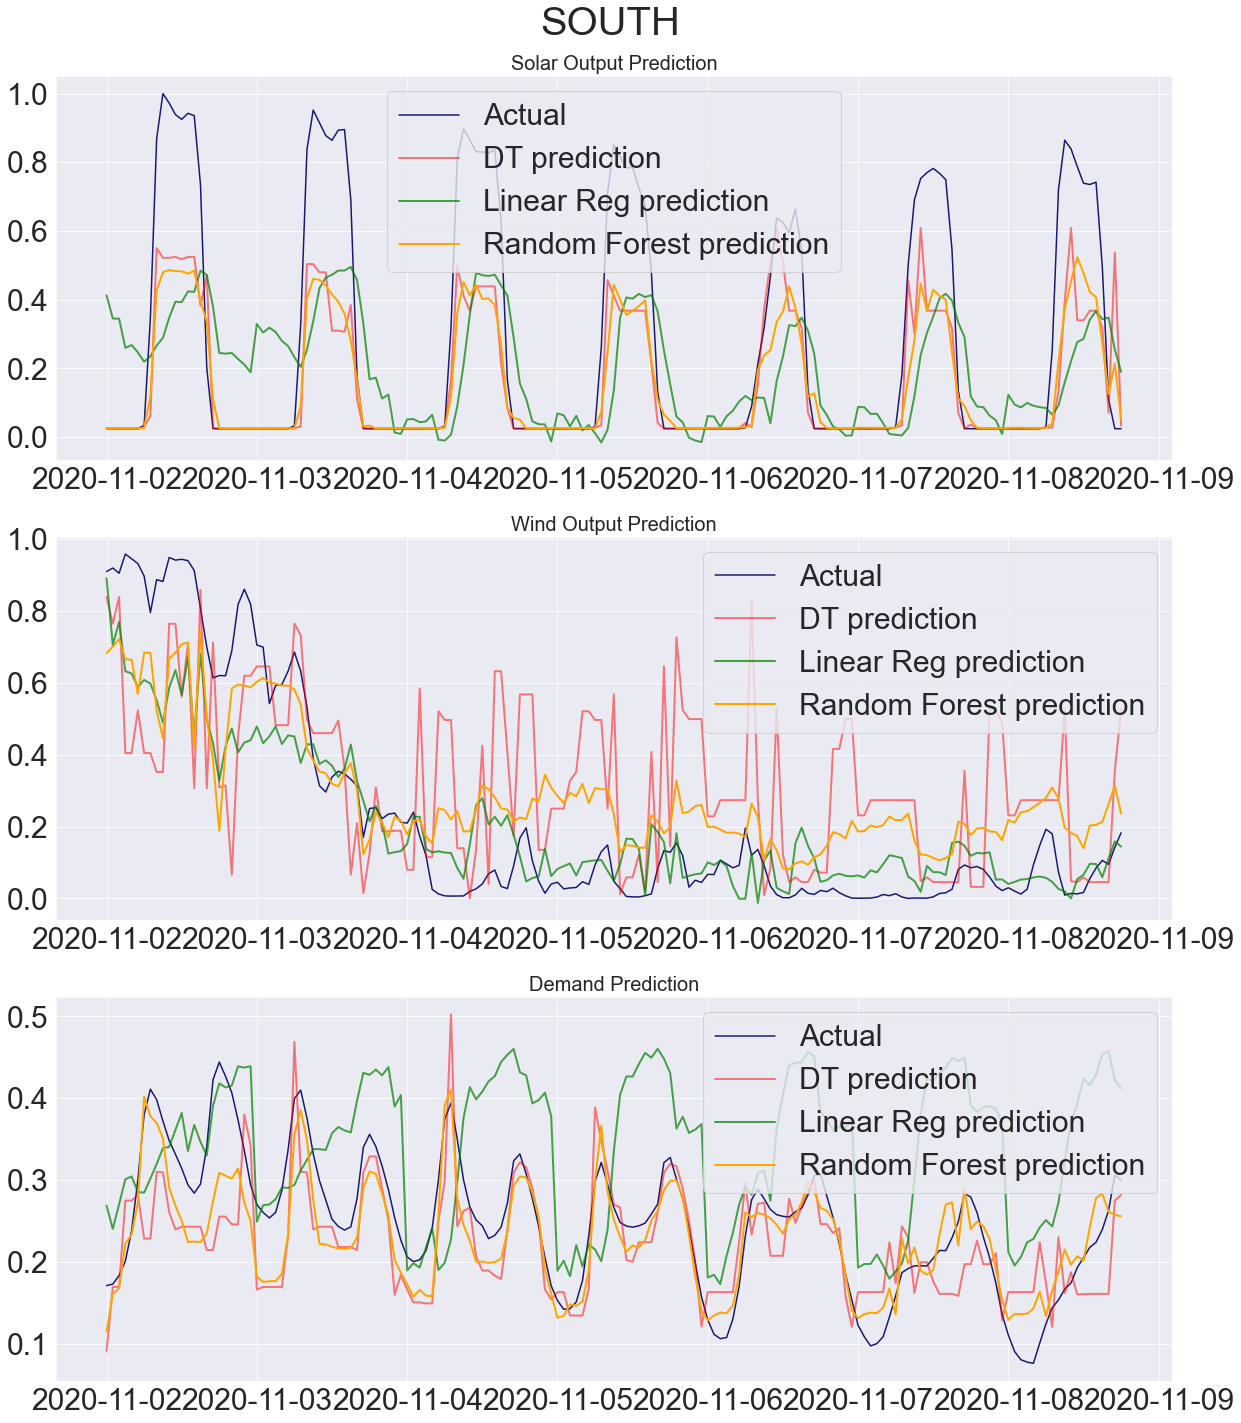

In [33]:
plt.figure(figsize = (20,24))
dfs = SOUTH
regions = 'SOUTH'
REN = ['_solar','_wind','_demand']

names = ['SOUTH']
ranges = [range(1,4)]
ranges = []
lm = LinearRegression()
tr = DecisionTreeRegressor()
for g,r in zip(range(1,4), range(len(REN)) ):
   
    ax = plt.subplot(3,1,g)
    plt.suptitle('SOUTH', fontsize=40,x=.51, y=0.92)
    X = dfs.drop(dfs.columns[-7:-4], axis=1)
    y = dfs[str(regions)+REN[r]]

    split = 0.99

    X_train, X_test, y_train, y_test = X[:int(split*len(X))], X[int(split*len(X)):], y[:int(split*len(X))], y[int(split*len(X)):]        
    
    
    dt = DecisionTreeRegressor(criterion = 'mse')
    dt.fit(X_train,y_train)
    y_1 = dt.predict(X_test)
    
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_2 = lr.predict(X_test)

    rf = RandomForestRegressor()
    rf.fit(X_train,y_train)
    y_3 =rf.predict(X_test)
    
    
    ax.plot(X_test.index.tolist(), y_test,color = 'midnightblue',label="Actual")
    
    ax.plot(X_test.index.tolist(), y_1, color="red",alpha=0.5,
              label="DT prediction", linewidth=2)
    
    ax.plot(X_test.index.tolist(), y_2, color="green", alpha=0.7,
              label="Linear Reg prediction", linewidth=2)
    
    ax.plot(X_test.index.tolist(), y_3, color="orange", alpha=1,
              label="Random Forest prediction", linewidth=2)
    
    
    labels = ax.get_xticks()[::1]
    ax.set_xticks(labels)
    plt.legend()
    
    
    if REN[r] == '_solar':
        plt.title('Solar Output Prediction', fontsize=20)
        
     
    if REN[r] == '_wind':
        plt.title('Wind Output Prediction', fontsize=20)
        
  
    if REN[r] == '_demand':
        plt.title('Demand Prediction', fontsize=20)

# ------------------------------------------------------------------------------------------

# Evaluation

In [13]:
R_dt= np.zeros((3,3))
R_lr = np.zeros((3,3))
R_f = np.zeros((3,3))   

dfs = [WEST,MIDATL,SOUTH]
regions = ['WEST','MIDATL','SOUTH']
REN = ['_solar','_wind','_demand']
ranges = [range(1,4),range(4,7),range(7,10)]
                 
for r in range(len(REN)):
    
    for i,g in zip(range(len(dfs)) , ranges[r] ):
       
      
        
        X = dfs[i].drop([str(regions[i])+'_solar',str(regions[i])+'_demand',str(regions[i])+'_wind'], axis=1)
        Y = dfs[i][str(regions[i])+REN[r]]
        
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2, shuffle = False)
        
        dt = DecisionTreeRegressor(criterion = 'mse')
        dt.fit(X_train,y_train)
        y_1 = dt.predict(X_test)
        R_dt[r,i] = mean_squared_error(y_test, y_1, squared=False)
        
       
        lr = LinearRegression()
        lr.fit(X_train,y_train)
        y_2 = lr.predict(X_test)
        R_lr[r,i] = mean_squared_error(y_test, y_2, squared=False)
                        
        tree = RandomForestRegressor()
        tree.fit(X_train,y_train)
        score_tree = tree.score(X_test,y_test)
        y_3 = tree.predict(X_test)
        R_f[r,i] = mean_squared_error(y_test, y_3, squared=False)
        
            
        
R_dt = pd.DataFrame(R_dt,index = regions , columns = REN)   
R_lr = pd.DataFrame(R_lr,index = regions , columns = REN)
R_f = pd.DataFrame(R_f,index = regions , columns = REN)
                 
                 
                 
print('-------------------------------')
print('Decision Tree RMSE')
print('-------------------------------')
print(R_dt)


print('-------------------------------')
print('LR RMSE')
print('-------------------------------')
print(R_lr)
                 
                 

print('-------------------------------')
print('RF RMSE')
print('-------------------------------')
print(R_f)
                

-------------------------------
Decision Tree RMSE
-------------------------------
          _solar     _wind   _demand
WEST    0.144929  0.118442  0.161554
MIDATL  0.238913  0.236404  0.232332
SOUTH   0.089863  0.082899  0.072221
-------------------------------
LR RMSE
-------------------------------
          _solar     _wind   _demand
WEST    0.173936  0.198994  0.214139
MIDATL  0.204065  0.179802  0.174596
SOUTH   0.177871  0.180209  0.193988
-------------------------------
RF RMSE
-------------------------------
          _solar     _wind   _demand
WEST    0.133651  0.100609  0.146076
MIDATL  0.192598  0.178784  0.157712
SOUTH   0.063055  0.055849  0.052089
